In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# Generating synthetic data with some noise
no_features=5
no_samples=5000

X=np.random.randn(no_features,no_samples) # (5,500)
W_true=np.array([[3,2,6,4,2]])  # (1,5)
b_true=np.array(4)  # (1,)
noise=np.random.randn(no_samples)  #(500,)
Y=np.dot(W_true,X)+b_true+noise #(1,500)


X.shape,Y.shape

((5, 5000), (1, 5000))

In [3]:
def split_data(X,Y,train=0.8):
    indices=np.arange(len(Y))
    np.random.shuffle(indices)
    train_indices,test_indices=indices[: int(train*len(Y))],indices[int(train*len(Y)):]
    train_X,train_Y=np.array([X[i] for i in train_indices]),np.array([Y[i] for i in train_indices])
    test_X,test_Y=np.array([X[i] for i in test_indices]),np.array([Y[i] for i in test_indices])
    return train_X,train_Y,test_X,test_Y
    

def normalize(x):
    normalized=(x-x.mean())/x.std()
    return normalized


# forward propatation on single layer
def linear_forward(W,b,X):
    return np.dot(W,X)+b

# ReLU Activation Function
def ReLU(z):
    return np.maximum(0,z)


def ReLU_derivatives(z):
    return (z>0).astype(float)
    

# parameter initialization 
def initialize_parameters(input_features,output_features):
    W=np.random.randn(output_features,input_features)*0.01
    b=np.zeros((output_features,1))
    return W,b





# neurons contains the no of neurons in each layer. starting from layer 0.
# neurons=np.array([3,2,1])
def initialize_layers(neurons):
    parameters={}
    for l in range(len(neurons)-1):
        parameters["W_"+str(l+1)],parameters["b_"+str(l+1)]= initialize_parameters(input_features=neurons[l],output_features=neurons[l+1])
    return parameters
        


def forward_propagation(X,parameters,no_layers):
    input_data=X
    cache={}
    cache["A_0"]=X
    
    for i in range(1,no_layers):
        Z=linear_forward(parameters['W_'+str(i)],parameters['b_'+str(i)],input_data)
        cache["Z_"+str(i)]=Z

        # No activation in last layer( only linear value)
        if(i==no_layers-1):
            continue
        A=ReLU(Z)
        cache["A_"+str(i)]=A
        input_data=A
    return cache, Z


def backward_propagation(X,Y,y_pred,parameters,cache,no_layers,learning_rate):
    # no_layers-=1  # 0th layer is not counted
    # m=X.shape[1] #(5,500)
    # Z=y_pred
    # a_prev=cache["A_"+str(no_layers-1)]
    # dZ=y_pred-Y # (1,500) 
    
    # # For Last Layer:
    # dW= (1/m)*np.dot(dZ,a_prev.T)
    # db=(1/m)*np.sum(dZ,axis=1,keepdims=True)

    # parameters["W_"+str(no_layers)]-=(learning_rate*dW)
    # parameters["b_"+str(no_layers)]-=(learning_rate*db)

    # # For layers other than last layer:
    # for l in np.flip(range(1,no_layers)):
    #     a_prev=cache["A_"+str(l-1)]
    #     Z=cache["Z_"+str(l)]
    #     W_next=parameters["W_"+str(l+1)]
    #     dZ=np.dot(W_next.T,dZ) * ReLU_derivatives(Z)
       
        
    #     dW= (1/m)*np.dot(dZ,a_prev.T)
    #     db=(1/m)*np.sum(dZ,axis=1,keepdims=True)


    
    parameters["W_"+str(no_layers)]-=(learning_rate*dW)
    parameters["b_"+str(no_layers)]-=(learning_rate*db)


    for i in np.flip(range(1,no_layers)):
        a_prev=cache["A_"+str(i-1)]
        Z=cache["Z_"+str(i)]
        W_next=parameters["W_"+str(i+1)]
        dZ=np.dot(W_next.T,dZ)*ReLU_derivatives(Z)

        dW=(1/m)*np.dot(dZ,a_prev.T)
        db=(1/m)*sum(dZ,axis=1,keepdims=True)
        
        # # Parameters updation
        parameters["W_"+str(i)]-=(learning_rate*dW)
        parameters["b_"+str(i)]-=(learning_rate*db)


        

def loss_fn(y_pred,Y):
    return np.mean(np.square(y_pred-Y))

def train(X,Y,neurons,epochs=1,learning_rate=0.01):
    # neurons is no of neurons in each layers excluding the layer[0] since Layer[0] is input itself.
    neurons=np.insert(neurons,0,X.shape[0]) # No of features of X is made neurons of L[0]
    parameters=initialize_layers(neurons)

    losses=[]

    for epoch in range(1,epochs+1):
        cache,y_pred=forward_propagation(X,parameters,no_layers=len(neurons))
        loss=loss_fn(y_pred,Y)
        losses.append(loss) 
        backward_propagation(X,Y,y_pred,parameters,cache,no_layers=len(neurons),learning_rate=learning_rate)

    return parameters,losses

In [4]:
neurons=np.array([1])
learning_rate=0.1
epochs=50
parameters,losses=train(X,Y,neurons,epochs=epochs,learning_rate=learning_rate)

KeyError: 'W_2'

In [14]:
X_norm=normalize(X)
Y_norm=normalize(Y)
parameters_norm,losses_norm=train(X_norm,Y_norm,neurons,epochs=epochs,learning_rate=learning_rate)


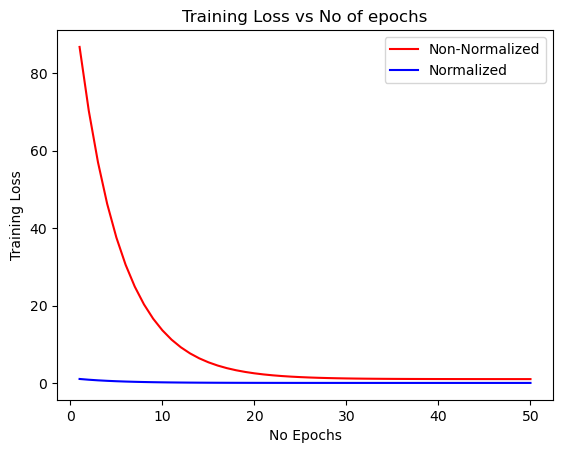

In [15]:

plt.plot(range(1,epochs+1),losses,c="r",label="Non-Normalized")
plt.plot(range(1,epochs+1),losses_norm,c="b",label="Normalized")

plt.title("Training Loss vs No of epochs")
plt.xlabel("No Epochs")
plt.ylabel("Training Loss")
plt.legend()